# 1

In [ ]:
# import statements
import numpy as np
import math
from matplotlib import pyplot as plt
from skimage import io

def part1():
    """ BasicBayer: reconstruct RGB image using GRGB pattern"""
    filename_Grayimage = 'PeppersBayerGray.bmp'
    filename_gridB = 'gridB.bmp'
    filename_gridR = 'gridR.bmp'
    filename_gridG = 'gridG.bmp'

    # read image
    img = io.imread(filename_Grayimage, as_gray =True)
    h,w = img.shape

    # our final image will be a 3 dimentional image with 3 channels
    rgb = np.zeros((h,w,3),np.uint8)

    # reconstruction of the green channel IG
    IG = np.copy(img) # copy the image into each channel

    for row in range(0,h,4): # loop step is 4 since our mask size is 4.
        for col in range(0,w,4): # loop step is 4 since our mask size is 4.
            # TODO: compute pixel value for each location where mask is unshaded (0)
            # interpolate each pixel using its every valid (shaded) neighbour
            IG[row,col+1]= (int(img[row,col])+int(img[row,col+2])+int(img[row+1,col+1]))/3  # B (recommendation: add this kinf of inline comments to each line within for loop)
            # ...
            IG[row+3,col]= (int(img[row+2,col])+int(img[row+3,col+1]))/2                    # M
            # ...

    # TODO: show green (IR) in first subplot (221) and add title - refer to rgb one for hint on plotting
    plt.figure(figsize=(10,8))
    # ...


    # TODO: reconstruction of the red channel IR (simiar to loops above),
    #
    # TODO: show IR in second subplot (224) and title
    # ...

    # TODO: reconstruction of the blue channel IB (similar to loops above),
    # ...
    # TODO: show IB in third subplot () and title
    # ...


    # TODO: merge the three channels IG, IB, IR in the correct order
    rgb[:,:,1]=IG
    # ...


    # TODO: show rgb image in final subplot (224) and add title
    plt.subplot(224)
    plt.imshow(rgb),plt.title('rgb')
    plt.show()

if __name__  == "__main__":
    part1()

# 2

In [ ]:
import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor


# Finds the closest colour in the palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]


# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    return spatial.KDTree(colours)


# Dynamically calculates an N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    # TODO: perform KMeans clustering to get 'colours' --  the computed k means

    colours_img = np.zeros((50, int(nColours*50), 3), dtype=np.float32)
    start_id = 0
    for col_id in range(nColours):
        end_id = start_id + 50
        colours_img[:, start_id:end_id, :] = colours[col_id, :]
        start_id = end_id

    print(f'colours:\n{colours}')

    plt.figure(figsize=(10, 5))
    plt.imshow(colours_img)

    return makePalette(colours)


def ModifiedFloydSteinbergDitherColor(image, palette):
    """
    The following pseudo-code for a grayscale image is grabbed from Wikipedia:
    https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering.
    The error distribution has been modified according to the instructions on eClass.

    total_abs_err := 0
    for each y from top to bottom ==> (height)
        for each x from left to right ==> (width)
            oldpixel  := image[x][y]
            newpixel  := nearest(oldpixel) # Determine the new colour for the current pixel from palette
            image[x][y]  := newpixel
            quant_error  := oldpixel - newpixel

            total_abs_err := total_abs_err + abs(quant_error)

            image[x + 1][y    ] := image[x + 1][y    ] + quant_error * 11 / 26
            image[x - 1][y + 1] := image[x - 1][y + 1] + quant_error * 5 / 26
            image[x    ][y + 1] := image[x    ][y + 1] + quant_error * 7 / 26
            image[x + 1][y + 1] := image[x + 1][y + 1] + quant_error * 3 / 26

    avg_abs_err := total_abs_err / image.size
    """

    # TODO: implement agorithm for RGB image (hint: you need to handle error in each channel separately)

    return image


if __name__ == "__main__":
    # The number colours: change to generate a dynamic palette
    nColours = 7

    # read image
    imfile = 'mandrill.png'
    image = io.imread(imfile)
    orig = image.copy()

    # Strip the alpha channel if it exists
    image = image[:, :, :3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    colours = img_as_float([colours.astype(np.ubyte)])[0]

    # call dithering function
    img = ModifiedFloydSteinbergDitherColor(image, palette)

    # show
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(orig), plt.title('Original Image')
    plt.subplot(122), plt.imshow(img), plt.title(f'Dithered Image (nColours = {nColours})')
    plt.show()


# 3

In [ ]:
# Import libraries
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

def read_image():
    original_img = io.imread('bird.jpeg')
    return original_img


def calculate_trans_mat(image):
    """
    return translation matrix that shifts center of image to the origin and its inverse
    """
    trans_mat = None
    trans_mat_inv = None

    # TODO: implement this function (overwrite the two lines above)
    # ...

    return trans_mat, trans_mat_inv



def rotate_image(image):
    ''' rotate and return image '''
    h, w = image.shape[:2]
    trans_mat, trans_mat_inv = calculate_trans_mat(image)

    # TODO: determine angle and create Tr
    angle = ...
    angle_rad = ...
    Tr = np.array([])

    # TODO: compute inverse transformation to go from output to input pixel locations
    Tr_inv = ...

    out_img = np.zeros_like(image)
    for out_y in range(h):
        for out_x in range(w):
            # TODO: find input pixel location from output pixel ocation and inverse transform matrix, copy over value from input location to output location
            ...

    return out_img, Tr



def scale_image(image):
    ''' scale image and return '''
    # TODO: implement this function, similar to above
    out_img = np.zeros_like(image)
    Ts = np.array([])

    return out_img, Ts



def skew_image(image):
    ''' Skew image and return '''
    # TODO: implement this function like above
    out_img = np.zeros_like(image)
    Tskew = np.array([])

    return out_img, Tskew


def combined_warp(image):
    ''' implement your own code to perform the combined warp of rotate, scale, skew and return image + transformation matrix  '''
    # TODO: implement combined warp on your own.
    # You need to combine the transformation matrices before performing the warp
    # (you may want to use the above functions to get the transformation matrices)
    out_img = np.zeros_like(image)
    Tc = np.array([])

    return out_img, Tc


def combined_warp_biinear(image):
    ''' perform the combined warp with bilinear interpolation (just show image) '''
    # TODO: implement combined warp -- you can use skimage.trasnform functions for this part (import if needed)
    # (you may want to use the above functions (above combined) to get the combined transformation matrix)
    out_img = np.zeros_like(image)

    return out_img



if __name__ == "__main__":
    image = read_image()
    plt.imshow(image), plt.title("Oiginal Image"), plt.show()

    rotated_img, _ = rotate_image(image)
    plt.figure(figsize=(15,5))
    plt.subplot(131),plt.imshow(rotated_img), plt.title("Rotated Image")

    scaled_img, _ = scale_image(image)
    plt.subplot(132),plt.imshow(scaled_img), plt.title("Scaled Image")

    skewed_img, _ = skew_image(image)
    plt.subplot(133),plt.imshow(skewed_img), plt.title("Skewed Image"), plt.show()

    combined_warp_img, _ = combined_warp(image)
    plt.figure(figsize=(10,5))
    plt.subplot(121),plt.imshow(combined_warp_img), plt.title("Combined Warp Image")

    combined_warp_biliear_img = combined_warp_biinear(image)
    plt.subplot(122),plt.imshow(combined_warp_biliear_img.astype(np.uint8)), plt.title("Combined Warp Image with Bilinear Interpolation"),plt.show()





# 4

In [2]:
from skimage import io
from skimage.feature import ORB, match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, SimilarityTransform, warp
from skimage.color import gray2rgb
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

# Load images
image0 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im1.jpg', True)
image1 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im2.jpg', True)

# Detect features using ORB
descriptor_extractor = ORB(n_keypoints=200)
descriptor_extractor.detect_and_extract(image0)
keypoints0 = descriptor_extractor.keypoints
descriptors0 = descriptor_extractor.descriptors

descriptor_extractor.detect_and_extract(image1)
keypoints1 = descriptor_extractor.keypoints
descriptors1 = descriptor_extractor.descriptors

matches = match_descriptors(descriptors0, descriptors1, cross_check=True, max_distance=2.0)

# Compute homography matrix using RANSAC and ProjectiveTransform
data = np.column_stack((keypoints0[matches[:, 0]], keypoints1[matches[:, 1]]))
model_robust, inliers = ransac(data, ProjectiveTransform, min_samples=4, residual_threshold=0.5)

# ------------- Warping ----------------
# Find the shape of the output image by considering the extents of all warped images
r, c = image1.shape[:2]

# Image corners
corners = np.array([[0, 0],
                    [0, r],
                    [c, 0],
                    [c, r]])

# Warp image corners to new positions
warped_corners = model_robust(corners)

# Find the extents of both images
all_corners = np.vstack((warped_corners, corners))
corner_min = np.min(all_corners, axis=0)
corner_max = np.max(all_corners, axis=0)

# Output shape
output_shape = (corner_max - corner_min)
output_shape = np.ceil(output_shape[::-1])

# Warp images according to the estimated transformation model
offset = SimilarityTransform(translation=-corner_min)
image0_ = warp(image0, offset.inverse, output_shape=output_shape)
image1_ = warp(image1, (model_robust + offset).inverse, output_shape=output_shape)

# Display warped images
plt.subplot(223), plt.imshow(image0_, cmap="gray"), plt.title("Warped first image")
plt.subplot(224), plt.imshow(image1_, cmap="gray"), plt.title("Warped second image")
plt.show()

# An alpha channel is added to the warped images before merging them into a single image
def add_alpha(image, background=-1):
    rgb = gray2rgb(image)
    alpha = (image != background)
    return np.dstack((rgb, alpha))

# Add alpha to the images
image0_alpha = add_alpha(image0_)
image1_alpha = add_alpha(image1_)

# Merge the alpha added images
merged = (image0_alpha + image1_alpha)

# Normalize by the maximum alpha value to avoid artifacts
alpha = merged[..., 3]
merged /= np.maximum(alpha, 1)[..., np.newaxis]

# Display the final stitched image
plt.figure(figsize=(10, 8))
plt.imshow(merged, cmap="gray")
plt.show()

# Display 10 randomly selected inlier matches using plot_matches
from skimage.feature import plot_matches
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))

# Randomly select 10 inlier matches and show them using plot_matches
selected_matches = matches[inliers][np.random.choice(np.sum(inliers), 10, replace=False)]
plot_matches(ax, image0, image1, keypoints0, keypoints1, selected_matches)

plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


TypeError: ProjectiveTransform.estimate() missing 1 required positional argument: 'dst'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


colours:
[[0.54629099 0.73757949 0.87480399]
 [0.39680794 0.41506359 0.31235544]
 [0.91194625 0.32804978 0.22571025]
 [0.70249574 0.70402244 0.64357467]
 [0.24205461 0.23567072 0.19258817]
 [0.69969728 0.61628496 0.34607467]
 [0.46115644 0.54980491 0.53059137]]


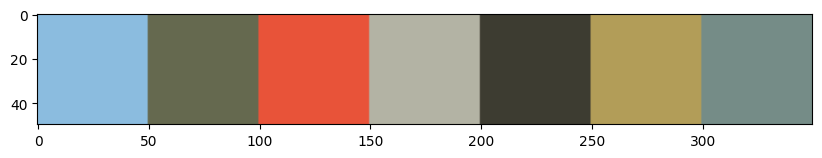

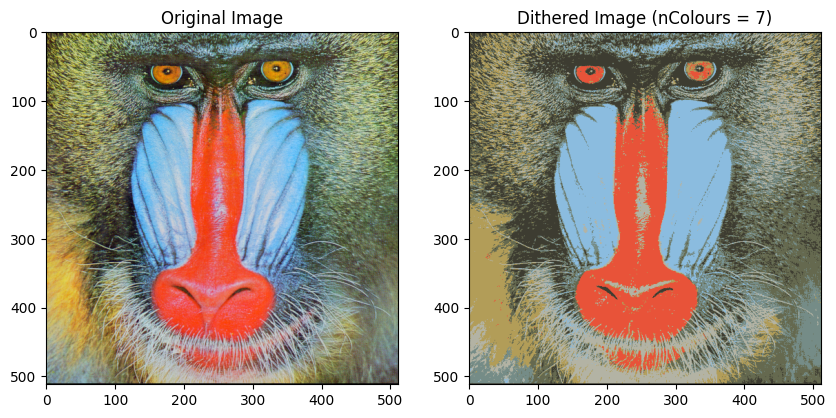

In [6]:
import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from google.colab import drive
drive.mount('/content/drive')

# Finds the closest colour in thepip  palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]


# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    return spatial.KDTree(colours)


# Dynamically calculates an N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    # TODO: perform KMeans clustering to get 'colours' --  the computed k means
    reshaped_image = image.reshape((-1, 3))  # Reshape the image to 2D array
    kmeans = KMeans(n_clusters=nColours, random_state=42)
    kmeans.fit(reshaped_image)
    colours = kmeans.cluster_centers_


    colours_img = np.zeros((50, int(nColours*50), 3), dtype=np.float32)
    start_id = 0
    for col_id in range(nColours):
        end_id = start_id + 50
        colours_img[:, start_id:end_id, :] = colours[col_id, :]
        start_id = end_id

    print(f'colours:\n{colours}')

    plt.figure(figsize=(10, 5))
    plt.imshow(colours_img)

    return makePalette(colours)

'''
def ModifiedFloydSteinbergDitherColor(image, palette):

    The following pseudo-code for a grayscale image is grabbed from Wikipedia:
    https://en.wikipedia.org/wiki/Floyd%E2%80%93Steinberg_dithering.
    The error distribution has been modified according to the instructions on eClass.

    total_abs_err := 0
    for each y from top to bottom ==> (height)
        for each x from left to right ==> (width)
            oldpixel  := image[x][y]
            newpixel  := nearest(oldpixel) # Determine the new colour for the current pixel from palette
            image[x][y]  := newpixel
            quant_error  := oldpixel - newpixel

            total_abs_err := total_abs_err + abs(quant_error)

            image[x + 1][y    ] := image[x + 1][y    ] + quant_error * 11 / 26
            image[x - 1][y + 1] := image[x - 1][y + 1] + quant_error * 5 / 26
            image[x    ][y + 1] := image[x    ][y + 1] + quant_error * 7 / 26
            image[x + 1][y + 1] := image[x + 1][y + 1] + quant_error * 3 / 26

    avg_abs_err := total_abs_err / image.size
    """

    # TODO: implement agorithm for RGB image (hint: you need to handle error in each channel separately)

    return image
'''

def ModifiedFloydSteinbergDitherColor(image, palette):
    height, width, _ = image.shape
    total_abs_err = 0

    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x, :]

            # Determine the new colour for the current pixel from palette
            new_pixel = nearest(palette, old_pixel)
            image[y, x, :] = new_pixel

            # Quantization error
            quant_error = old_pixel - new_pixel
            total_abs_err += np.sum(np.abs(quant_error))

            # Diffusion of error to neighboring pixels
            if x + 1 < width:
                image[y, x + 1, :] += quant_error * 11 / 26
            if x - 1 >= 0 and y + 1 < height:
                image[y + 1, x - 1, :] += quant_error * 5 / 26
            if y + 1 < height:
                image[y + 1, x, :] += quant_error * 7 / 26
            if x + 1 < width and y + 1 < height:
                image[y + 1, x + 1, :] += quant_error * 3 / 26

    avg_abs_err = total_abs_err / (height * width * 3)  # Average error per channel per pixel

    return image

if __name__ == "__main__":
    # The number colours: change to generate a dynamic palette
    nColours = 7

    # read image
    imfile = "/content/drive/My Drive/cmput 206/assignment3/mandrill.png"
    image = io.imread(imfile)
    orig = image.copy()

    # Strip the alpha channel if it exists
    image = image[:, :, :3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    colours = img_as_float([colours.astype(np.ubyte)])[0]

    # call dithering function
    img = ModifiedFloydSteinbergDitherColor(image, palette)

    # show
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(orig), plt.title('Original Image')
    plt.subplot(122), plt.imshow(img), plt.title(f'Dithered Image (nColours = {nColours})')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


colours:
[[0.54629099 0.73757949 0.87480399]
 [0.39680794 0.41506359 0.31235544]
 [0.91194625 0.32804978 0.22571025]
 [0.70249574 0.70402244 0.64357467]
 [0.24205461 0.23567072 0.19258817]
 [0.69969728 0.61628496 0.34607467]
 [0.46115644 0.54980491 0.53059137]]
Average absolute error: 0.0


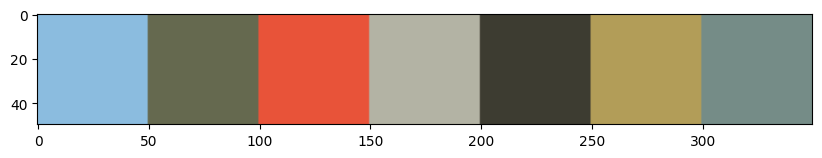

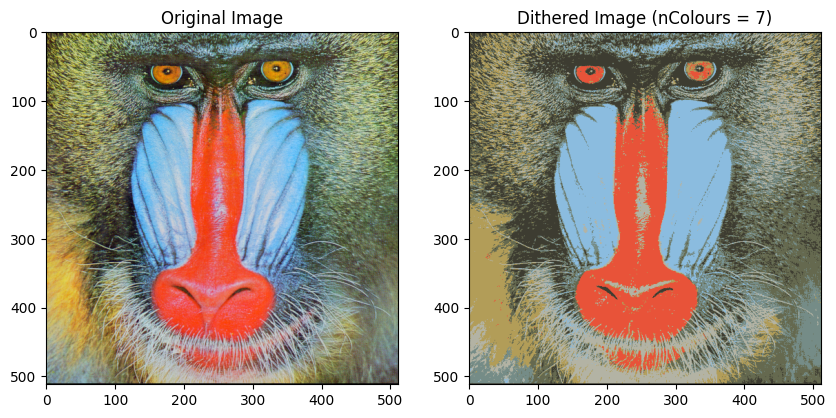

In [ ]:
import os
from sklearn.cluster import KMeans
from scipy import spatial
from skimage import io, color, img_as_float
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from google.colab import drive
drive.mount('/content/drive')

# Finds the closest colour in thepip  palette using kd-tree.
def nearest(palette, colour):
    dist, i = palette.query(colour)
    return palette.data[i]

# Make a kd-tree palette from the provided list of colours
def makePalette(colours):
    return spatial.KDTree(colours)

# Dynamically calculates an N-colour palette for the given image
# Uses the KMeans clustering algorithm to determine the best colours
# Returns a kd-tree palette with those colours
def findPalette(image, nColours):
    reshaped_image = image.reshape((-1, 3))  # Reshape the image to 2D array
    kmeans = KMeans(n_clusters=nColours, random_state=42)
    kmeans.fit(reshaped_image)
    colours = kmeans.cluster_centers_

    # Ensure color values are in the range [0, 1]
    colours = img_as_float(colours)

    colours_img = np.zeros((50, int(nColours * 50), 3), dtype=np.float32)
    start_id = 0
    for col_id in range(nColours):
        end_id = start_id + 50
        colours_img[:, start_id:end_id, :] = colours[col_id, :]
        start_id = end_id

    print(f'colours:\n{colours}')

    plt.figure(figsize=(10, 5))
    plt.imshow(colours_img)

    return makePalette(colours)

def ModifiedFloydSteinbergDitherColor(image, palette):
    height, width, _ = image.shape
    total_abs_err = 0
    diffusion_matrix = np.array([[0, 0, 0], [0, 11/26, 0], [5/26, 7/26, 3/26]])

    for y in range(height):
        for x in range(width):
            old_pixel = image[y, x, :]

            # Determine the new colour for the current pixel from palette
            new_pixel = nearest(palette, old_pixel)
            image[y, x, :] = new_pixel

            # Quantization error
            quant_error = old_pixel - new_pixel
            total_abs_err += np.sum(np.abs(quant_error))

            # Diffusion of error to neighboring pixels
            for i in range(-1, 2):
                for j in range(-1, 2):
                    if 0 <= x + j < width and 0 <= y + i < height:
                        image[y + i, x + j, :] += quant_error * diffusion_matrix[i + 1, j + 1]

    avg_abs_err = total_abs_err / (height * width * 3)  # Average error per channel per pixel
    print(f"Average absolute error: {avg_abs_err}")

    return image

if __name__ == "__main__":
    # The number colours: change to generate a dynamic palette
    nColours = 7

    # read image
    imfile = "/content/drive/My Drive/cmput 206/assignment3/mandrill.png"
    image = io.imread(imfile)
    orig = image.copy()

    # Strip the alpha channel if it exists
    image = image[:, :, :3]

    # Convert the image from 8bits per channel to floats in each channel for precision
    image = img_as_float(image)

    # Dynamically generate an N colour palette for the given image
    palette = findPalette(image, nColours)
    colours = palette.data
    colours = img_as_float([colours.astype(np.float32)])[0]

    # call dithering function
    img = ModifiedFloydSteinbergDitherColor(image, palette)

    # show
    plt.figure(figsize=(10, 5))
    plt.subplot(121), plt.imshow(orig), plt.title('Original Image')
    plt.subplot(122), plt.imshow(img), plt.title(f'Dithered Image (nColours = {nColours})')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


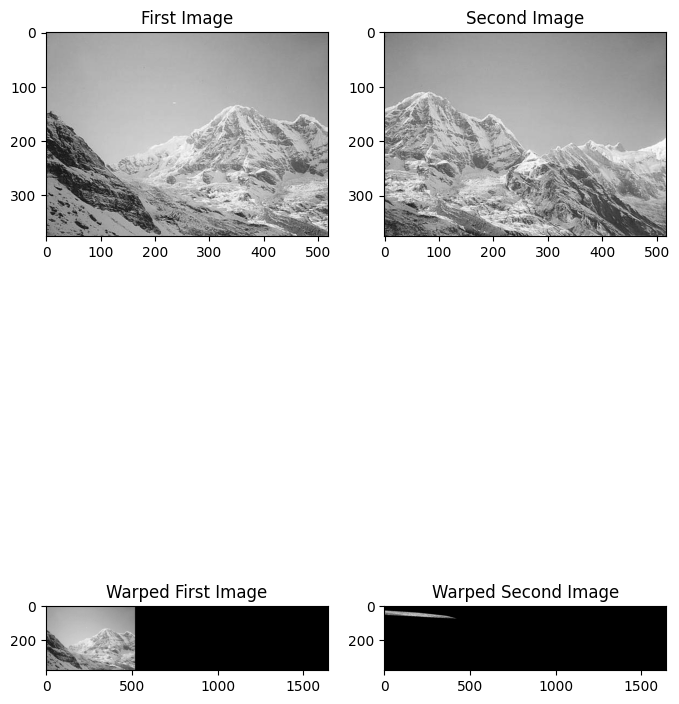

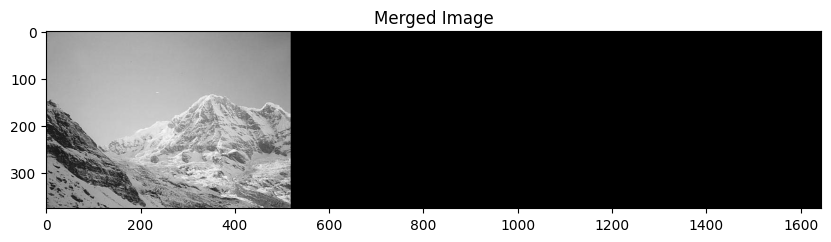

In [22]:
from skimage import io, exposure, transform, color
from skimage.feature import ORB, match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, SimilarityTransform, warp
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive (assuming you're running this in Google Colab)
drive.mount('/content/drive')

def part4():
    ''' Stitch two images together '''
    # Load images
    image0 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im1.jpg', as_gray=True)
    image1 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im2.jpg', as_gray=True)

    # Display the original images
    plt.figure(figsize=(8, 12))
    plt.subplot(221), plt.imshow(image0, cmap='gray'), plt.title("First Image")
    plt.subplot(222), plt.imshow(image1, cmap='gray'), plt.title("Second Image")

    # Step 1: Feature detection with ORB
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(image0)
    keypoints0, descriptors0 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
    descriptor_extractor.detect_and_extract(image1)
    keypoints1, descriptors1 = descriptor_extractor.keypoints, descriptor_extractor.descriptors

    # Step 2: Feature matching
    matches = match_descriptors(descriptors0, descriptors1, cross_check=True, max_distance=100.0)

    # Step 3: Homography estimation with RANSAC
    src = keypoints0[matches[:, 0]][:, :2]
    dst = keypoints1[matches[:, 1]][:, :2]
    model_robust, inliers = ransac((src, dst), ProjectiveTransform, min_samples=4, residual_threshold=8)

    # Step 4: Image warping and stitching
    # Calculate the output shape of the panorama
    r, c = image1.shape[:2]
    corners = np.array([[0, 0], [0, r], [c, 0], [c, r]])
    warped_corners = model_robust(corners)
    all_corners = np.vstack((warped_corners, corners))
    corner_min = np.min(all_corners, axis=0)
    corner_max = np.max(all_corners, axis=0)
    output_shape = (corner_max - corner_min).astype(np.int32)
    output_shape = output_shape[::-1]  # Reverse to match (rows, cols)

    # Warp images
    offset = SimilarityTransform(translation=-corner_min)
    image0_warped = warp(image0, offset.inverse, output_shape=output_shape)
    image1_warped = warp(image1, (model_robust + offset).inverse, output_shape=output_shape)

    # Show warped images
    plt.subplot(223), plt.imshow(image0_warped, cmap="gray"), plt.title("Warped First Image")
    plt.subplot(224), plt.imshow(image1_warped, cmap="gray"), plt.title("Warped Second Image")
    plt.show()

    # Merging warped images with alpha blending
    def add_alpha(image, background=-1):
        """Add an alpha layer to the image."""
        rgb = color.gray2rgb(image)
        alpha = (image != background)
        return np.dstack((rgb, alpha))

    image0_alpha = add_alpha(image0_warped)
    image1_alpha = add_alpha(image1_warped)
    merged_image = np.where(image0_alpha[:,:,3,None], image0_alpha[:,:,:3], image1_alpha[:,:,:3])

    # Display the merged image
    plt.figure(figsize=(10, 8))
    plt.imshow(merged_image)
    plt.title("Merged Image")
    plt.show()

    # Display 10 random inlier matches
    if np.sum(inliers) > 10:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
        idxs = np.where(inliers)[0]
        chosen_idxs = np.random.choice(idxs, 10, replace=False)
        plot_matches(ax, image0, image1, keypoints0, keypoints1, np.column_stack([chosen_idxs, chosen_idxs]), matches_color='b', only_matches=True)
        plt.show()

if __name__ == "__main__":
    part4()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


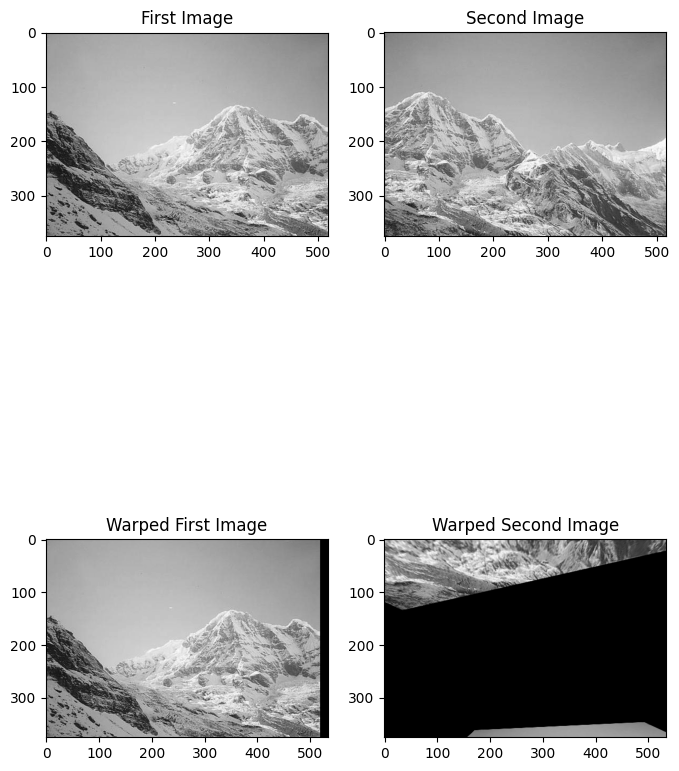

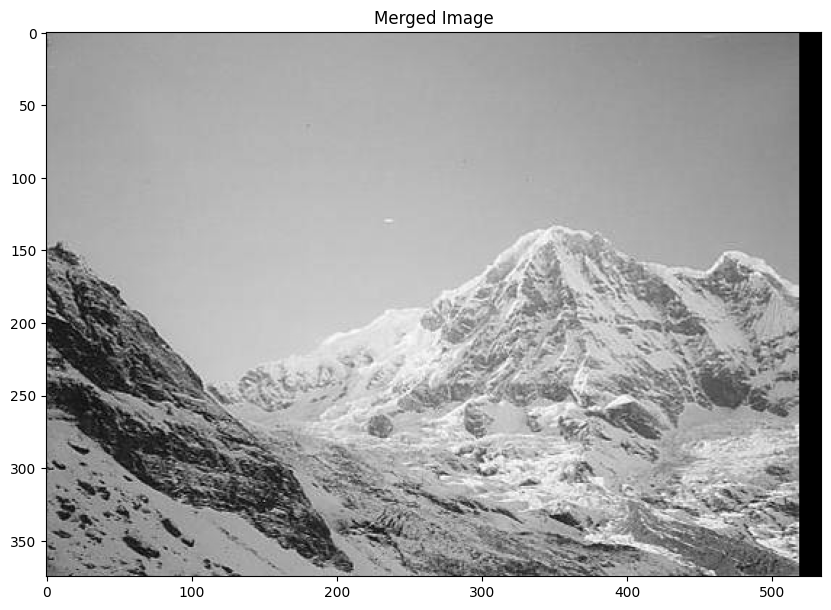

TypeError: plot_matches() got an unexpected keyword argument 'matches_color'

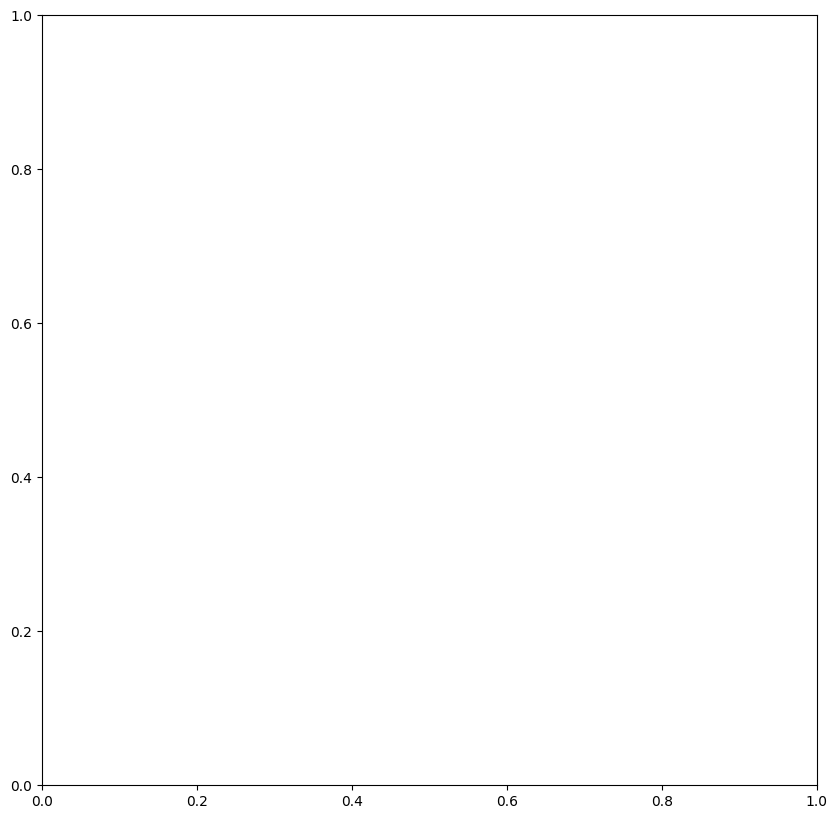

In [23]:
from skimage import io, exposure, transform, color
from skimage.feature import ORB, match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, SimilarityTransform, warp
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive (assuming you're running this in Google Colab)
drive.mount('/content/drive')

def part4():
    ''' Stitch two images together '''
    # Load images
    image0 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im1.jpg', as_gray=True)
    image1 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im2.jpg', as_gray=True)

    # Display the original images
    plt.figure(figsize=(8, 12))
    plt.subplot(221), plt.imshow(image0, cmap='gray'), plt.title("First Image")
    plt.subplot(222), plt.imshow(image1, cmap='gray'), plt.title("Second Image")

    # Step 1: Feature detection with ORB
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(image0)
    keypoints0, descriptors0 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
    descriptor_extractor.detect_and_extract(image1)
    keypoints1, descriptors1 = descriptor_extractor.keypoints, descriptor_extractor.descriptors

    # Step 2: Feature matching
    matches = match_descriptors(descriptors0, descriptors1, cross_check=True, max_distance=100.0)

    # Step 3: Homography estimation with RANSAC
    src = keypoints0[matches[:, 0]][:, :2]
    dst = keypoints1[matches[:, 1]][:, :2]
    model_robust, inliers = ransac((src, dst), ProjectiveTransform, min_samples=4, residual_threshold=8)

    # Step 4: Image warping and stitching
    # Calculate the output shape of the panorama
    r, c = image1.shape[:2]
    corners = np.array([[0, 0], [0, r], [c, 0], [c, r]])
    warped_corners = model_robust(corners)
    all_corners = np.vstack((warped_corners, corners))
    corner_min = np.min(all_corners, axis=0)
    corner_max = np.max(all_corners, axis=0)
    output_shape = (corner_max - corner_min).astype(np.int32)
    output_shape = output_shape[::-1]  # Reverse to match (rows, cols)

    # Warp images
    offset = SimilarityTransform(translation=-corner_min)
    image0_warped = warp(image0, offset.inverse, output_shape=output_shape)
    image1_warped = warp(image1, (model_robust + offset).inverse, output_shape=output_shape)

    # Show warped images
    plt.subplot(223), plt.imshow(image0_warped, cmap="gray"), plt.title("Warped First Image")
    plt.subplot(224), plt.imshow(image1_warped, cmap="gray"), plt.title("Warped Second Image")
    plt.show()

    # Merging warped images with alpha blending
    def add_alpha(image, background=-1):
        """Add an alpha layer to the image."""
        rgb = color.gray2rgb(image)
        alpha = (image != background)
        return np.dstack((rgb, alpha))

    image0_alpha = add_alpha(image0_warped)
    image1_alpha = add_alpha(image1_warped)
    merged_image = np.where(image0_alpha[:,:,3,None], image0_alpha[:,:,:3], image1_alpha[:,:,:3])

    # Display the merged image
    plt.figure(figsize=(10, 8))
    plt.imshow(merged_image)
    plt.title("Merged Image")
    plt.show()

    # Display 10 random inlier matches
    if np.sum(inliers) > 10:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
        idxs = np.where(inliers)[0]
        chosen_idxs = np.random.choice(idxs, 10, replace=False)
        plot_matches(ax, image0, image1, keypoints0, keypoints1, np.column_stack([chosen_idxs, chosen_idxs]), matches_color='b', only_matches=True)
        plt.show()

if __name__ == "__main__":
    part4()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


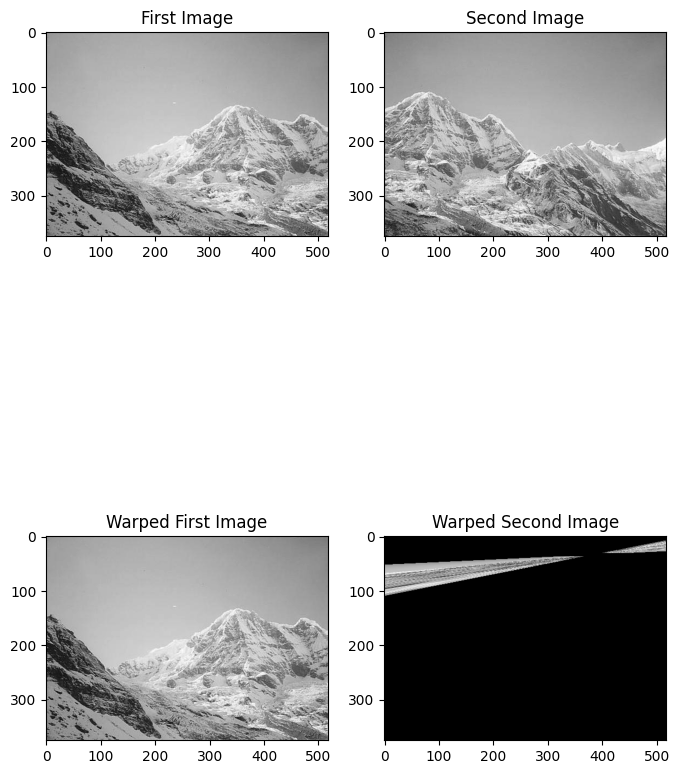

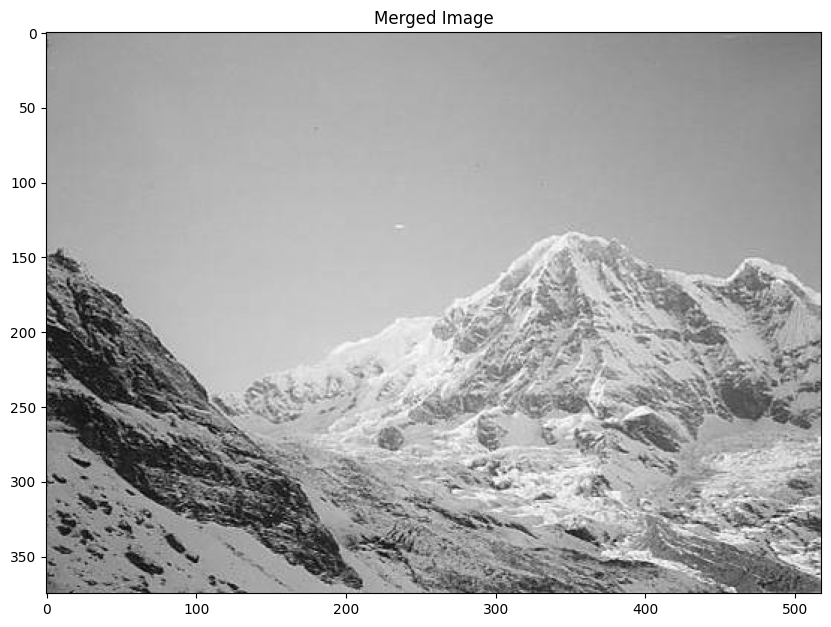

In [1]:
from skimage import io, exposure, transform, color
from skimage.feature import ORB, match_descriptors
from skimage.measure import ransac
from skimage.transform import ProjectiveTransform, SimilarityTransform, warp
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive

# Mount Google Drive (assuming you're running this in Google Colab)
drive.mount('/content/drive')

def part4():
    ''' Stitch two images together '''
    # Load images
    image0 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im1.jpg', as_gray=True)
    image1 = io.imread('/content/drive/My Drive/cmput 206/assignment3/im2.jpg', as_gray=True)

    # Display the original images
    plt.figure(figsize=(8, 12))
    plt.subplot(221), plt.imshow(image0, cmap='gray'), plt.title("First Image")
    plt.subplot(222), plt.imshow(image1, cmap='gray'), plt.title("Second Image")

    # Step 1: Feature detection with ORB
    descriptor_extractor = ORB(n_keypoints=200)
    descriptor_extractor.detect_and_extract(image0)
    keypoints0, descriptors0 = descriptor_extractor.keypoints, descriptor_extractor.descriptors
    descriptor_extractor.detect_and_extract(image1)
    keypoints1, descriptors1 = descriptor_extractor.keypoints, descriptor_extractor.descriptors

    # Step 2: Feature matching
    matches = match_descriptors(descriptors0, descriptors1, cross_check=True, max_distance=100.0)

    # Step 3: Homography estimation with RANSAC
    src = keypoints0[matches[:, 0]][:, :2]
    dst = keypoints1[matches[:, 1]][:, :2]
    model_robust, inliers = ransac((src, dst), ProjectiveTransform, min_samples=20, residual_threshold=8)

    # Step 4: Image warping and stitching
    # Calculate the output shape of the panorama
    r, c = image1.shape[:2]
    corners = np.array([[0, 0], [0, r], [c, 0], [c, r]])
    warped_corners = model_robust(corners)
    all_corners = np.vstack((warped_corners, corners))
    corner_min = np.min(all_corners, axis=0)
    corner_max = np.max(all_corners, axis=0)
    output_shape = (corner_max - corner_min).astype(np.int32)
    output_shape = output_shape[::-1]  # Reverse to match (rows, cols)

    # Warp images
    offset = SimilarityTransform(translation=-corner_min)
    image0_warped = warp(image0, offset.inverse, output_shape=output_shape)
    image1_warped = warp(image1, (model_robust + offset).inverse, output_shape=output_shape)

    # Show warped images
    plt.subplot(223), plt.imshow(image0_warped, cmap="gray"), plt.title("Warped First Image")
    plt.subplot(224), plt.imshow(image1_warped, cmap="gray"), plt.title("Warped Second Image")
    plt.show()

    # Merging warped images with alpha blending
    def add_alpha(image, background=-1):
        """Add an alpha layer to the image."""
        rgb = color.gray2rgb(image)
        alpha = (image != background)
        return np.dstack((rgb, alpha))

    image0_alpha = add_alpha(image0_warped)
    image1_alpha = add_alpha(image1_warped)
    merged_image = np.where(image0_alpha[:,:,3,None], image0_alpha[:,:,:3], image1_alpha[:,:,:3])

    # Display the merged image
    plt.figure(figsize=(10, 8))
    plt.imshow(merged_image)
    plt.title("Merged Image")
    plt.show()

    # Display 10 random inlier matches
    if np.sum(inliers) > 10:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
        idxs = np.where(inliers)[0]
        chosen_idxs = np.random.choice(idxs, 10, replace=False)
        plot_matches(ax, image0, image1, keypoints0, keypoints1, np.column_stack([chosen_idxs, chosen_idxs]), matches_color='b', only_matches=True)
        plt.show()

if __name__ == "__main__":
    part4()
